Required Libraries.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

Loading Train and Test data.

In [2]:
df_train=pd.read_csv("Maligant_train.csv")
df_test=pd.read_csv("Maligant_test.csv")

In [3]:
df_train.head()

,id,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0


In [4]:
df_train.columns

Index(['id', 'comment_text', 'malignant', 'highly_malignant', 'rude', 'threat',
       'abuse', 'loathe'],
      dtype='object')

In [5]:
df_train.shape #checking data dimension

(159571, 8)

In [6]:
df_train.info() #checking data type

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159571 entries, 0 to 159570
Data columns (total 8 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   id                159571 non-null  object
 1   comment_text      159571 non-null  object
 2   malignant         159571 non-null  int64 
 3   highly_malignant  159571 non-null  int64 
 4   rude              159571 non-null  int64 
 5   threat            159571 non-null  int64 
 6   abuse             159571 non-null  int64 
 7   loathe            159571 non-null  int64 
dtypes: int64(6), object(2)
memory usage: 9.7+ MB


In [7]:
df_train.isnull().sum() #we can see that there are no null values in the data.

id                  0
comment_text        0
malignant           0
highly_malignant    0
rude                0
threat              0
abuse               0
loathe              0
dtype: int64

In [8]:
df_train.nunique()

id                  159571
comment_text        159571
malignant                2
highly_malignant         2
rude                     2
threat                   2
abuse                    2
loathe                   2
dtype: int64

Descriptive statistcs

In [9]:
df_train.describe()

,malignant,highly_malignant,rude,threat,abuse,loathe
count,159571.000000,159571.000000,159571.000000,159571.000000,159571.000000,159571.000000
mean,0.095844,0.009996,0.052948,0.002996,0.049364,0.008805
std,0.294379,0.099477,0.223931,0.054650,0.216627,0.093420
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Visualization

malignant
0    144277
1     15294
Name: malignant, dtype: int64


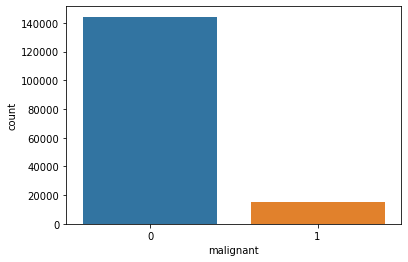

highly_malignant
0    157976
1      1595
Name: highly_malignant, dtype: int64


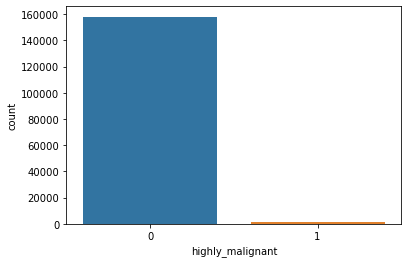

rude
0    151122
1      8449
Name: rude, dtype: int64


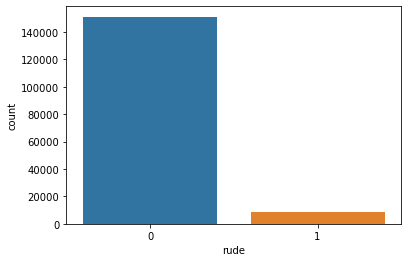

threat
0    159093
1       478
Name: threat, dtype: int64


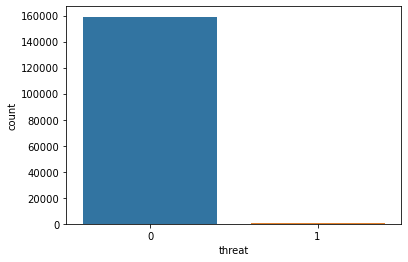

abuse
0    151694
1      7877
Name: abuse, dtype: int64


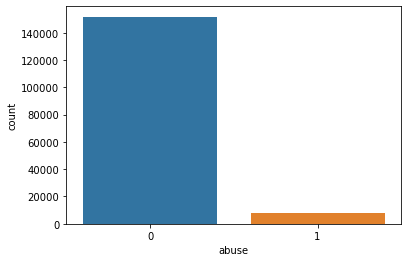

loathe
0    158166
1      1405
Name: loathe, dtype: int64


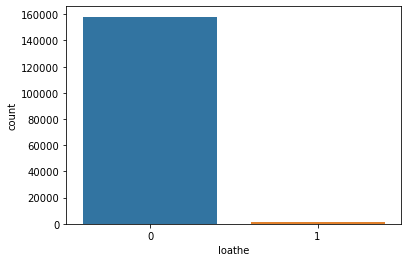

In [10]:
k=['malignant', 'highly_malignant', 'rude', 'threat','abuse', 'loathe']
for i in k:
    print(i)
    print(df_train[i].value_counts())
    sns.countplot(i,data=df_train)
    plt.show()

Coorelation Matrix

In [11]:
df_train.corr()

,malignant,highly_malignant,rude,threat,abuse,loathe
malignant,1.000000,0.308619,0.676515,0.157058,0.647518,0.266009
highly_malignant,0.308619,1.000000,0.403014,0.123601,0.375807,0.201600
rude,0.676515,0.403014,1.000000,0.141179,0.741272,0.286867
threat,0.157058,0.123601,0.141179,1.000000,0.150022,0.115128
abuse,0.647518,0.375807,0.741272,0.150022,1.000000,0.337736
loathe,0.266009,0.201600,0.286867,0.115128,0.337736,1.000000


In [12]:
from nltk.stem import WordNetLemmatizer
import nltk
from nltk.corpus import  stopwords
import string

In [13]:
df_train['length'] = df_train['comment_text'].str.len()
df_train.head(2)

,id,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe,length
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0,264
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0,112


Data PreProcessing for text data.

In [14]:
# Convert all messages to lower case
df_train['comment_text'] = df_train['comment_text'].str.lower()

# Replace email addresses with 'email'
df_train['comment_text'] = df_train['comment_text'].str.replace(r'^.+@[^\.].*\.[a-z]{2,}$','emailaddress')

# Replace URLs with 'webaddress'
df_train['comment_text'] = df_train['comment_text'].str.replace(r'^http\://[a-zA-Z0-9\-\.]+\.[a-zA-Z]{2,3}(/\S*)?$','webaddress')

# Replace money symbols with 'moneysymb' (£ can by typed with ALT key + 156)
df_train['comment_text'] = df_train['comment_text'].str.replace(r'£|\$', 'dollers')

# Replace 10 digit phone numbers (formats include paranthesis, spaces, no spaces, dashes) with 'phonenumber'
df_train['comment_text'] = df_train['comment_text'].str.replace(r'^\(?[\d]{3}\)?[\s-]?[\d]{3}[\s-]?[\d]{4}$','phonenumber')
   
# Replace numbers with 'numbr'
df_train['comment_text'] = df_train['comment_text'].str.replace(r'\d+(\.\d+)?','number')

In [15]:
#removing punctuations.
df_train['comment_text'] = df_train['comment_text'].apply(lambda x: ' '.join(term for term in x.split() if term not in string.punctuation))

#removing stopwords
stop_words = set(stopwords.words('english') + ['u', 'ü', 'ur', '4', '2', 'im', 'dont', 'doin', 'ure'])
df_train['comment_text'] = df_train['comment_text'].apply(lambda x: ' '.join(term for term in x.split() if term not in stop_words))

#applying lammatizing
lem=WordNetLemmatizer()
df_train['comment_text'] = df_train['comment_text'].apply(lambda x: ' '.join(lem.lemmatize(t) for t in x.split()))


In [16]:
df_train['clean_length'] = df_train.comment_text.str.len()
df_train.head()

,id,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe,length,clean_length
0,0000997932d777bf,explanation edits made username hardcore metal...,0,0,0,0,0,0,264,182
1,000103f0d9cfb60f,d'aww! match background colour i'm seemingly s...,0,0,0,0,0,0,112,115
2,000113f07ec002fd,"hey man, i'm really trying edit war. guy const...",0,0,0,0,0,0,233,149
3,0001b41b1c6bb37e,can't make real suggestion improvement wondere...,0,0,0,0,0,0,622,397
4,0001d958c54c6e35,"you, sir, hero. chance remember page that's on?",0,0,0,0,0,0,67,47


WordCloud Visualization.

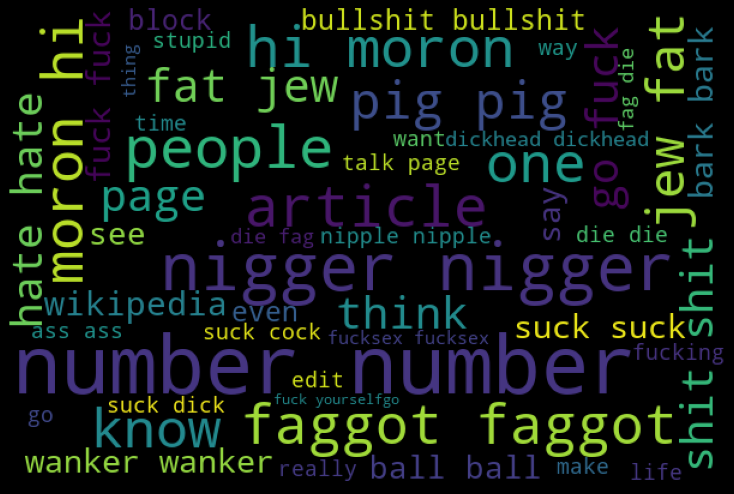

In [17]:
from wordcloud import WordCloud
hams = df_train['comment_text'][df_train['malignant']==1]
spam_cloud = WordCloud(width=600,height=400,background_color='black',max_words=50).generate(' '.join(hams))
plt.figure(figsize=(10,8),facecolor='k')
plt.imshow(spam_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

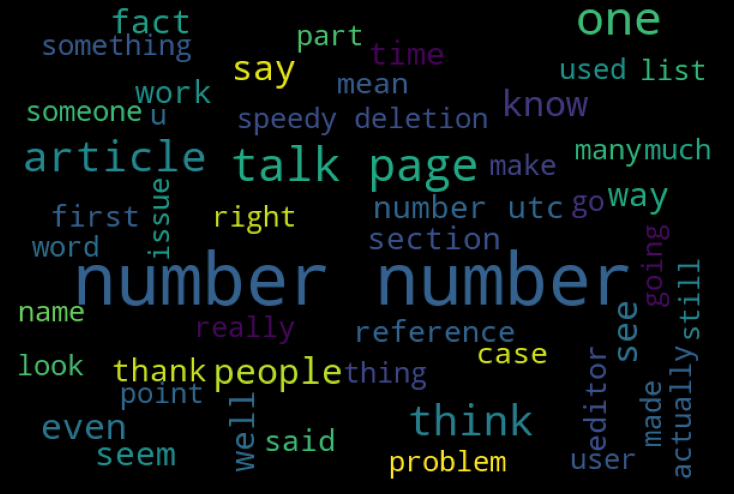

In [18]:
from wordcloud import WordCloud
hams = df_train['comment_text'][df_train['malignant']==0]
spam_cloud = WordCloud(width=600,height=400,background_color='black',max_words=50).generate(' '.join(hams))
plt.figure(figsize=(10,8),facecolor='k')
plt.imshow(spam_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

Feature Engineering

In [19]:
target_data = df_train[k]
df_train['bad'] =df_train[k].sum(axis =1)
print(df_train['bad'].value_counts())
df_train['bad'] = df_train['bad'] > 0 
df_train['bad'] = df_train['bad'].astype(int)
print(df_train['bad'].value_counts())

0    143346
1      6360
3      4209
2      3480
4      1760
5       385
6        31
Name: bad, dtype: int64
0    143346
1     16225
Name: bad, dtype: int64


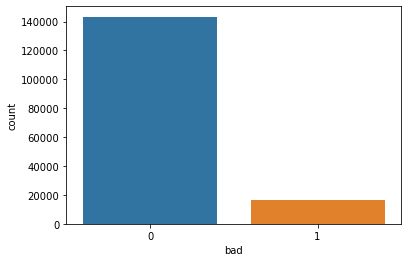

In [20]:
sns.countplot(x="bad" , data = df_train)
plt.show()

In [21]:
from sklearn.feature_extraction.text import TfidfVectorizer
tf_vec = TfidfVectorizer(max_features = 10000, stop_words='english')
features = tf_vec.fit_transform(df_train['comment_text'])
x=features

In [22]:
y=df_train["bad"]

Required Machine Learning libraries

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [24]:
lr=LogisticRegression()
dr=DecisionTreeClassifier()
nb=MultinomialNB()

Split data into train and test data.

In [25]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=40,test_size=0.30)

In [26]:
#we know that we have imbalanced data set. So we will use sampling technique to balance data. Here we used Oversampling technique.
from imblearn.over_sampling import SMOTE
smote=SMOTE()

In [27]:
x_train_smote, y_train_smote = smote.fit_sample(x_train,y_train)

In [28]:
from collections import Counter
print("Before Smote:", Counter (y_train))
print("After Smote:",Counter(y_train_smote))

Before Smote: Counter({0: 100434, 1: 11265})
After Smote: Counter({0: 100434, 1: 100434})


Logistic Regression

In [29]:
lr.fit(x_train_smote,y_train_smote)
pred=lr.predict(x_test)
print(accuracy_score(y_test,pred))
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

0.9096340240641712
[[39373  3539]
 [  787  4173]]
              precision    recall  f1-score   support

           0       0.98      0.92      0.95     42912
           1       0.54      0.84      0.66      4960

    accuracy                           0.91     47872
   macro avg       0.76      0.88      0.80     47872
weighted avg       0.93      0.91      0.92     47872



DecisionTreeClassifier

In [30]:
dr.fit(x_train_smote,y_train_smote)
pred=dr.predict(x_test)
print(accuracy_score(y_test,pred))
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

0.8989388368983957
[[39476  3436]
 [ 1402  3558]]
              precision    recall  f1-score   support

           0       0.97      0.92      0.94     42912
           1       0.51      0.72      0.60      4960

    accuracy                           0.90     47872
   macro avg       0.74      0.82      0.77     47872
weighted avg       0.92      0.90      0.91     47872



Naive Bayes

In [31]:
nb.fit(x_train_smote,y_train_smote)
pred=nb.predict(x_test)
print(accuracy_score(y_test,pred))
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

0.8983121657754011
[[38764  4148]
 [  720  4240]]
              precision    recall  f1-score   support

           0       0.98      0.90      0.94     42912
           1       0.51      0.85      0.64      4960

    accuracy                           0.90     47872
   macro avg       0.74      0.88      0.79     47872
weighted avg       0.93      0.90      0.91     47872



Let's check auc_roc_curve whether there is any over fitting.

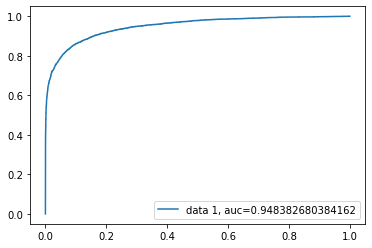

In [35]:
import sklearn.metrics as metrics
from sklearn.metrics import roc_auc_score
proba = lr.predict_proba(x_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  proba)
auc = metrics.roc_auc_score(y_test, proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

In [36]:
import joblib
joblib.dump(lr,'comments_maligant.obj')

['comments_maligant.obj']

Now we will get test data. 

In [37]:
df_test.head()

,id,comment_text
0,00001cee341fdb12,Yo bitch Ja Rule is more succesful then you'll...
1,0000247867823ef7,== From RfC == \n\n The title is fine as it is...
2,00013b17ad220c46,""" \n\n == Sources == \n\n * Zawe Ashton on Lap..."
3,00017563c3f7919a,":If you have a look back at the source, the in..."
4,00017695ad8997eb,I don't anonymously edit articles at all.


In [38]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 153164 entries, 0 to 153163
Data columns (total 2 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            153164 non-null  object
 1   comment_text  153164 non-null  object
dtypes: object(2)
memory usage: 2.3+ MB


In [39]:
df_test.isnull().sum()

id              0
comment_text    0
dtype: int64

Pre processing test data

In [40]:
# Convert all messages to lower case
df_test['comment_text'] = df_test['comment_text'].str.lower()

# Replace email addresses with 'email'
df_test['comment_text'] = df_test['comment_text'].str.replace(r'^.+@[^\.].*\.[a-z]{2,}$','emailaddress')

# Replace URLs with 'webaddress'
df_test['comment_text'] = df_test['comment_text'].str.replace(r'^http\://[a-zA-Z0-9\-\.]+\.[a-zA-Z]{2,3}(/\S*)?$','webaddress')

# Replace money symbols with 'moneysymb' (£ can by typed with ALT key + 156)
df_test['comment_text'] = df_test['comment_text'].str.replace(r'£|\$', 'dollers')

# Replace 10 digit phone numbers (formats include paranthesis, spaces, no spaces, dashes) with 'phonenumber'
df_test['comment_text'] = df_test['comment_text'].str.replace(r'^\(?[\d]{3}\)?[\s-]?[\d]{3}[\s-]?[\d]{4}$','phonenumber')
   
# Replace numbers with 'numbr'
df_test['comment_text'] = df_test['comment_text'].str.replace(r'\d+(\.\d+)?','number')

In [41]:
#removing punctuations.
df_test['comment_text'] = df_test['comment_text'].apply(lambda x: ' '.join(term for term in x.split() if term not in string.punctuation))

#removing stopwords
stop_words = set(stopwords.words('english') + ['u', 'ü', 'ur', '4', '2', 'im', 'dont', 'doin', 'ure'])
df_test['comment_text'] = df_test['comment_text'].apply(lambda x: ' '.join(term for term in x.split() if term not in stop_words))

#applying lammatizing
lem=WordNetLemmatizer()
df_test['comment_text'] = df_test['comment_text'].apply(lambda x: ' '.join(lem.lemmatize(t) for t in x.split()))

Changing text data into vectors(numerical)

In [42]:
from sklearn.feature_extraction.text import TfidfVectorizer
tf_vec = TfidfVectorizer(max_features = 10000, stop_words='english')
features = tf_vec.fit_transform(df_test['comment_text'])
X_test=features

In [43]:
best_prediction=joblib.load('comments_maligant.obj')
y=best_prediction.predict(X_test)

In [44]:
y=pd.DataFrame(y)

In [45]:
df_test['bad']=y

In [46]:
df_test['bad'].value_counts()

0    79783
1    73381
Name: bad, dtype: int64

Now with the help of wordcloud we will visualize whether the predicted values are how good

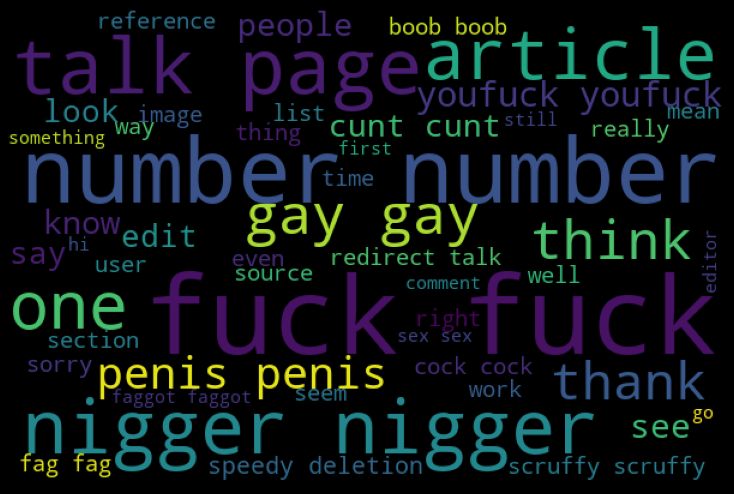

In [49]:
from wordcloud import WordCloud
hams = df_test['comment_text'][df_test['bad']==1]
spam_cloud = WordCloud(width=600,height=400,background_color='black',max_words=50).generate(' '.join(hams))
plt.figure(figsize=(10,8),facecolor='k')
plt.imshow(spam_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

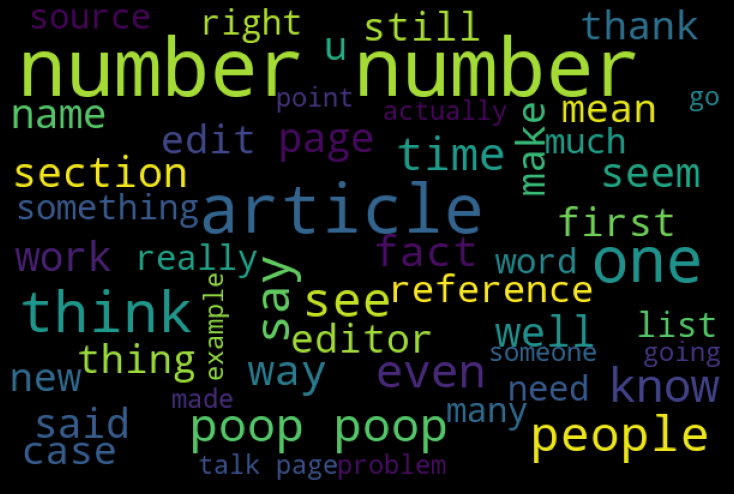

In [50]:
from wordcloud import WordCloud
hams = df_test['comment_text'][df_test['bad']==0]
spam_cloud = WordCloud(width=600,height=400,background_color='black',max_words=50).generate(' '.join(hams))
plt.figure(figsize=(10,8),facecolor='k')
plt.imshow(spam_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

In [51]:
df_test.to_csv('Maligant_predicted.csv')